# Prototype/Model Based Clustering

## K-means

In [1]:
from sklearn import datasets
from sklearn.metrics import adjusted_mutual_info_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns

%matplotlib inline

We will play again with the iris dataset, now using K-means. In this case we will look for 3 clusters

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 13.6 µs
0.748372393323


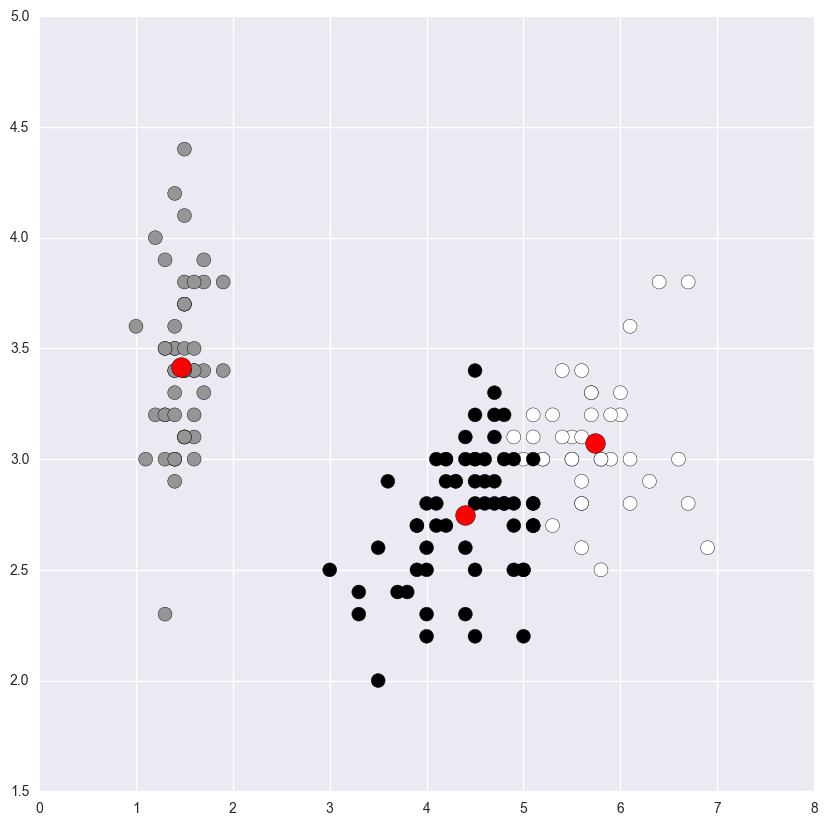

In [2]:
iris = datasets.load_iris()

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
%time {km.fit(iris['data'])}

labels = km.predict(iris['data'])
print(adjusted_mutual_info_score(iris['target'], labels))

plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,1], c='r', s=200)
plt.show()

Results are worse than hierarchical clustering

## GMM

Now for Gaussian Mixture Models, first using spherical clusters as estimation method.

/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is 

CPU times: user 84 µs, sys: 0 ns, total: 84 µs
Wall time: 88.7 µs
0.733118073528
855.341083135


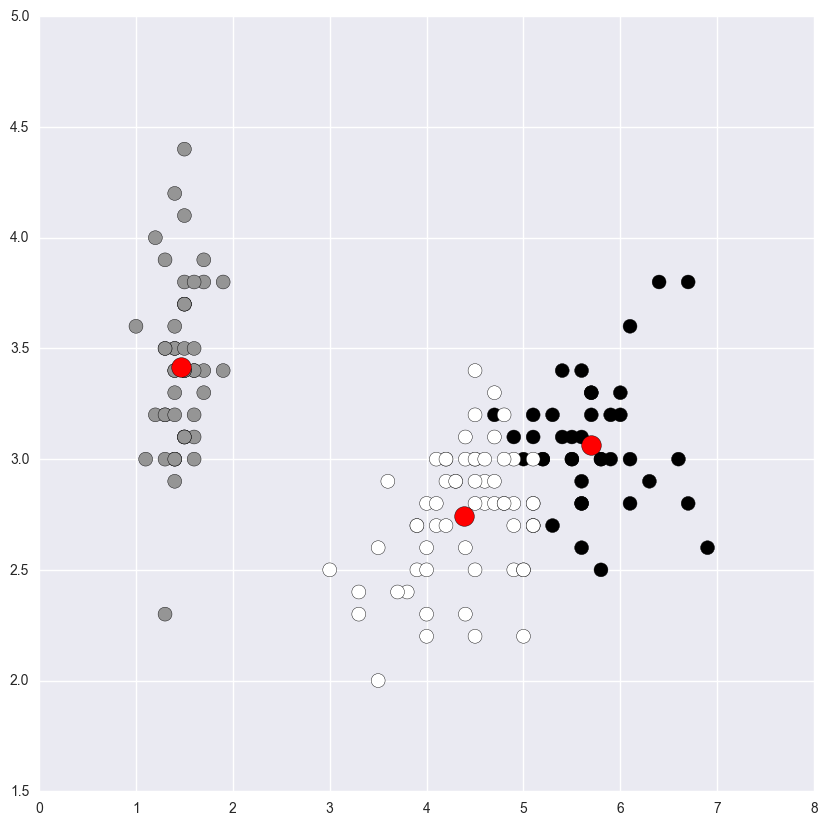

In [3]:
from sklearn.mixture import GMM
gmm = GMM(n_components=3, covariance_type='spherical')
%time {gmm.fit(iris['data'])}

labels = gmm.predict(iris['data'])
print(adjusted_mutual_info_score(iris['target'], labels))
print(gmm.bic(iris['data']))

plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.scatter(gmm.means_[:,2], gmm.means_[:,1], c='r', s=200)
plt.show()

As expected the results is comparable to the one from K-means.

Let's change the method of estimation assuming independent attributes (diagonal covariance).


/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is 

CPU times: user 109 µs, sys: 0 ns, total: 109 µs
Wall time: 115 µs
0.775960630485
747.795555546


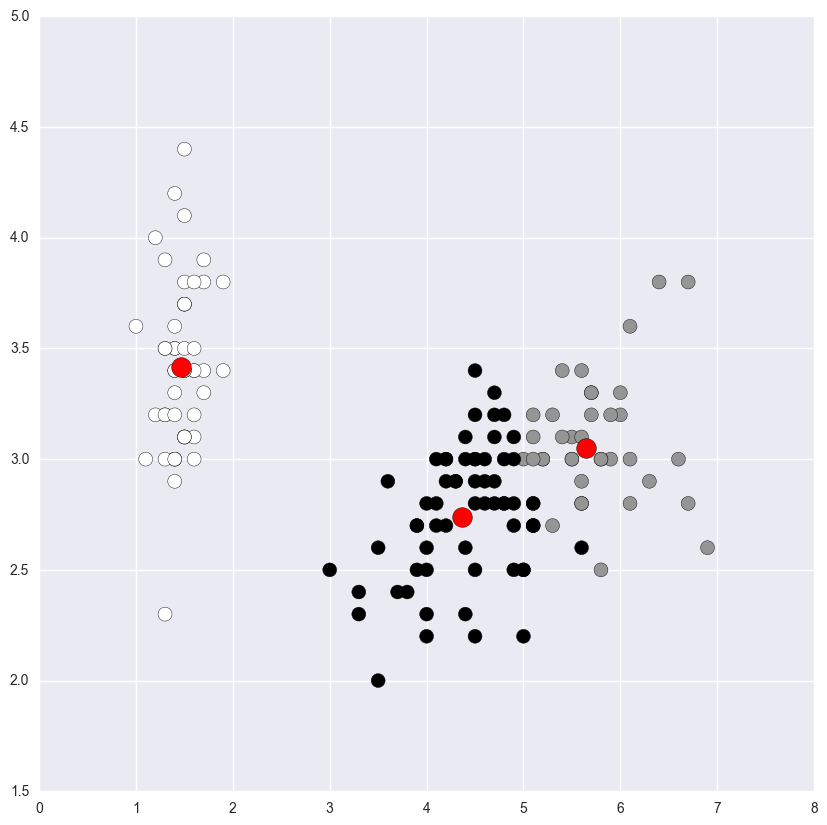

In [4]:
gmm = GMM(n_components=3, covariance_type='diag')
%time {gmm.fit(iris['data'])}

labels = gmm.predict(iris['data'])
print(adjusted_mutual_info_score(iris['target'], labels))
print(gmm.bic(iris['data']))

plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.scatter(gmm.means_[:,2], gmm.means_[:,1], c='r', s=200)
plt.show()

Now we change to the full model, with dependent attributes

/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is 

CPU times: user 75 µs, sys: 5 µs, total: 80 µs
Wall time: 85.4 µs
0.897053747626
583.390913061


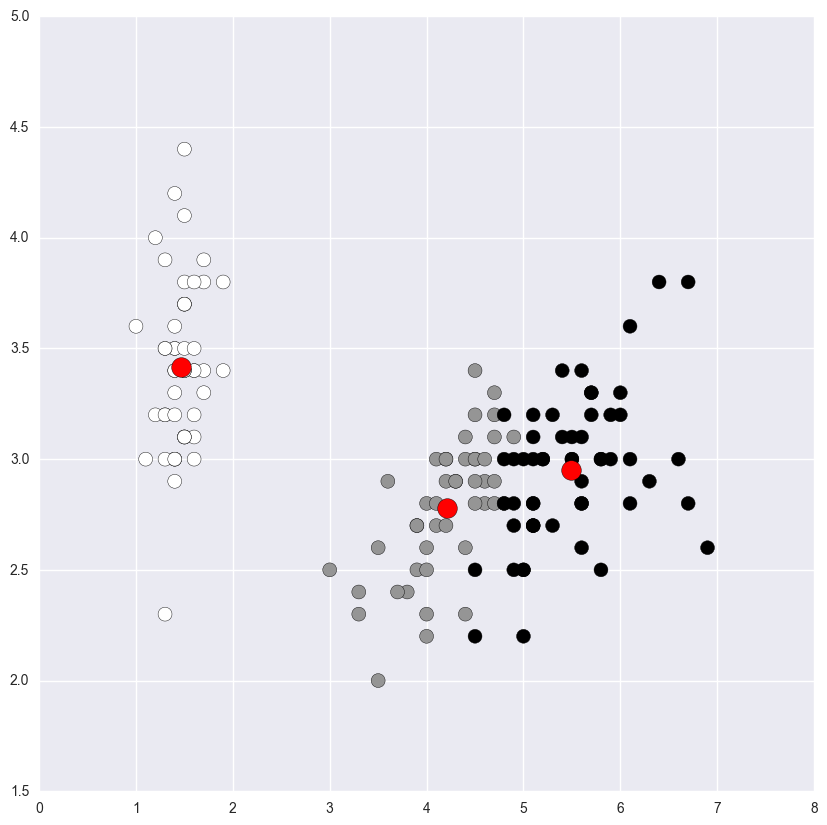

In [5]:
gmm = GMM(n_components=3, covariance_type='full')
%time {gmm.fit(iris['data'])}

labels = gmm.predict(iris['data'])
print(adjusted_mutual_info_score(iris['target'], labels))
print(gmm.bic(iris['data']))

plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.scatter(gmm.means_[:,2], gmm.means_[:,1], c='r', s=200)
plt.show()

This is now the **best model** we have found

## Leader Algorithm

Now we use the Leader Algorithm (from amltlearn), the main problem is to guess a radius that results in the number of clusters we want and the quality could not be the best, the upside is that this algorithm is faster than the rest.

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 10 µs
0.78425284897


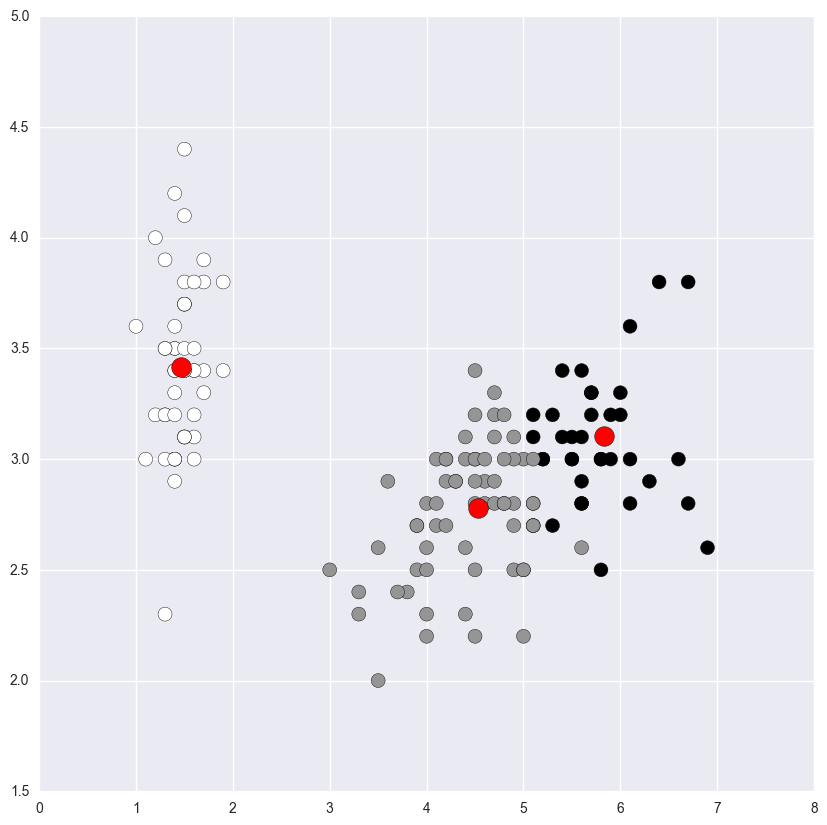

In [6]:
from amltlearn.cluster import Leader

lead = Leader(radius=2.5)
%time {lead.fit(iris['data'])}
labels = lead.predict(iris['data'])
print(adjusted_mutual_info_score(iris['target'], labels))

plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.scatter(lead.cluster_centers_[:,2], lead.cluster_centers_[:,1], c='r', s=200)
plt.show()

# Issues with K-means

Now we will generate artificial data to see some issues of K-means. The first problem appears when the clusters have different sizes and variances. Depending on the ratio of sizes and variance difference, part of the examples from the larger cluster could be assigned to the small one.

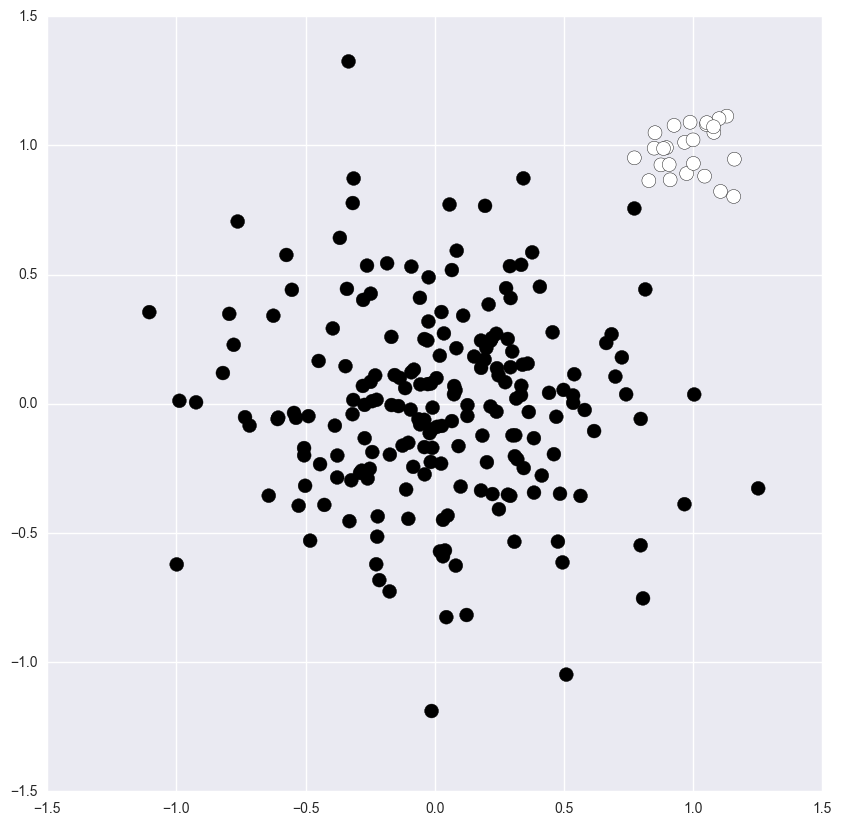

In [7]:
from amltlearn.datasets import make_blobs
blobs, blabels = make_blobs(n_samples=[25,200], n_features=2, centers=[[1,1], [0,0]], cluster_std=[0.1,0.4])

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
plt.scatter(blobs[:, 0], blobs[:, 1], c=blabels, s=100)
plt.show()

0.419849852407


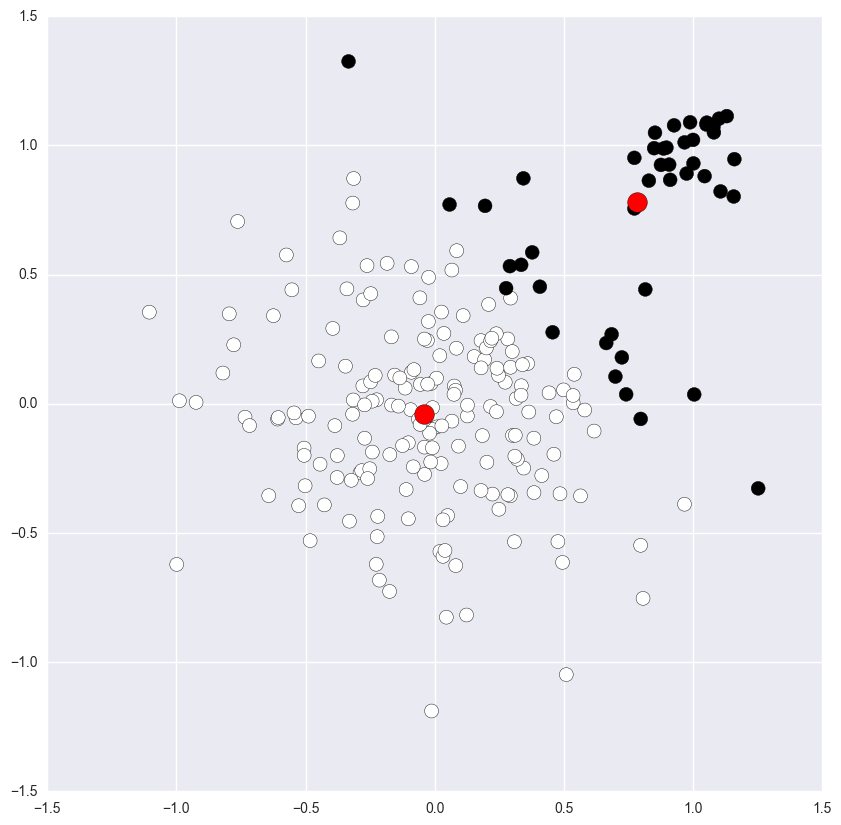

In [8]:
km = KMeans(n_clusters=2)
km.fit(blobs)

labels = km.fit_predict(blobs)

print(adjusted_mutual_info_score(blabels, labels))
plt.figure(figsize=(10,10))
plt.scatter(blobs[:, 0], blobs[:, 1], c=labels, s=100)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,0], c='r', s=200)
plt.show()

This could affect less to the GMM algorithm, but it is not free of this problem.

/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is 

0.921299667824


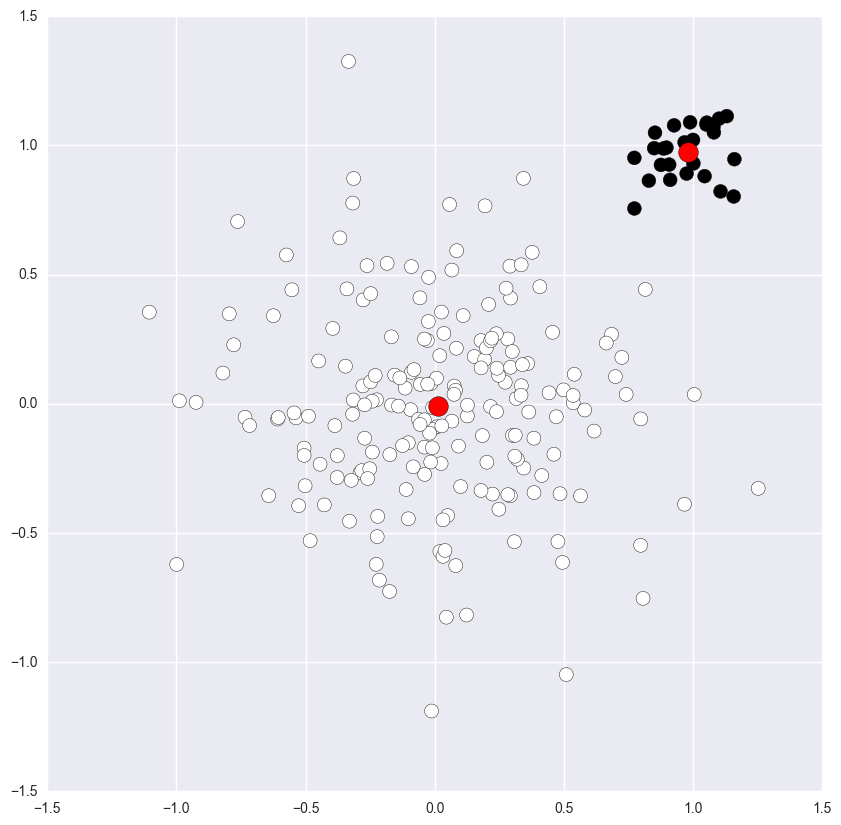

In [9]:
gmm = GMM(n_components=2, covariance_type='diag')
gmm.fit(blobs)

labels = gmm.predict(blobs)
print(adjusted_mutual_info_score(blabels, labels))

plt.figure(figsize=(10,10))
plt.scatter(blobs[:, 0], blobs[:, 1], c=labels, s=100)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], c='r', s=200)
plt.show()

You can play with the size, variance and positions of the cluster to see what happens.

Problems also appear when the clusters are not spherical and some attributes have more variance than others (actually are elipsoids). If the clusters are not well separated, the partition can result in not very natural clusters. You can change this data set and see what happens if you change the size, separation and variance of the clusters.

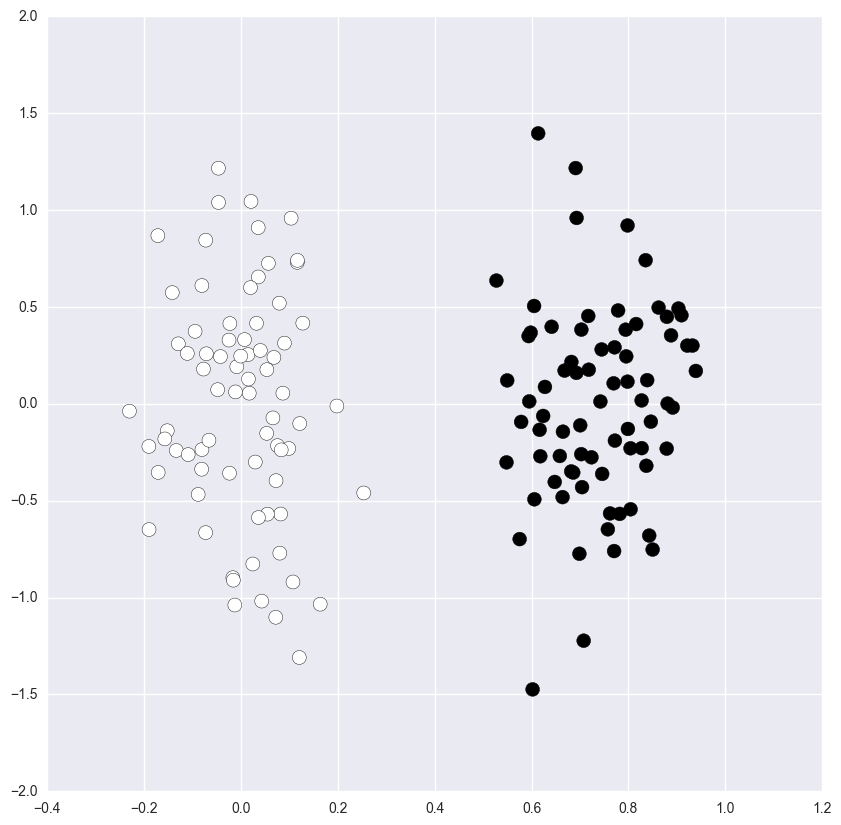

In [10]:
from numpy.random import normal
import numpy as np

size1 = 75
size2 = 75
data = np.zeros((size1+size2,2))

data[0:size1, 0] = normal(loc=0.0, scale=0.1, size=size1)
data[0:size1, 1] = normal(loc=0.0, scale=0.6, size=size1)
data[size1:, 0] = normal(loc=0.75, scale=0.1, size=size2)
data[size1:, 1] = normal(loc=0.0, scale=0.6, size=size2)

dlabels = np.zeros(size1+size2)
dlabels[size1:] = 1

plt.figure(figsize=(10,10))
plt.scatter(data[:, 0], data[:, 1], c=dlabels, s=100)
plt.show()

K-means divides the two clusters wrong (sometimes depends on the initialization, you can use the random_state parameter of K-means to see if different initializations get it right)

-0.00475232165048


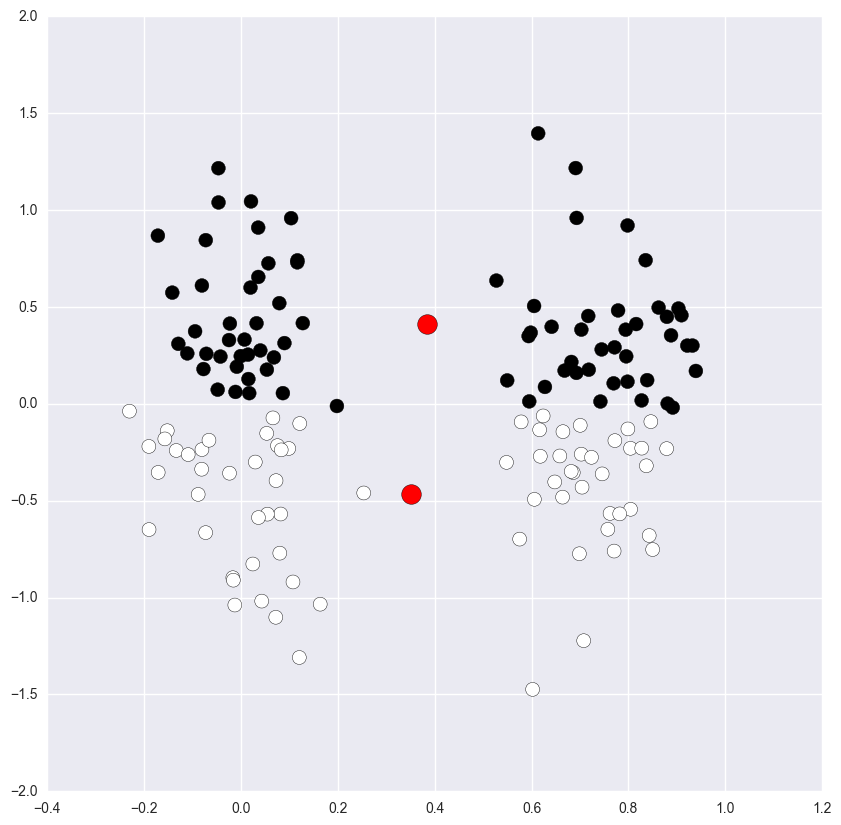

In [11]:
km = KMeans(n_clusters=2)
km.fit(data)

labels = km.fit_predict(data)

print(adjusted_mutual_info_score(dlabels, labels))

plt.figure(figsize=(10,10))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=100)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='r', s=200)
plt.show()

The same happens to GMM (also depends in initalization)

/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib/python3.4/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is 

-0.00371421955347


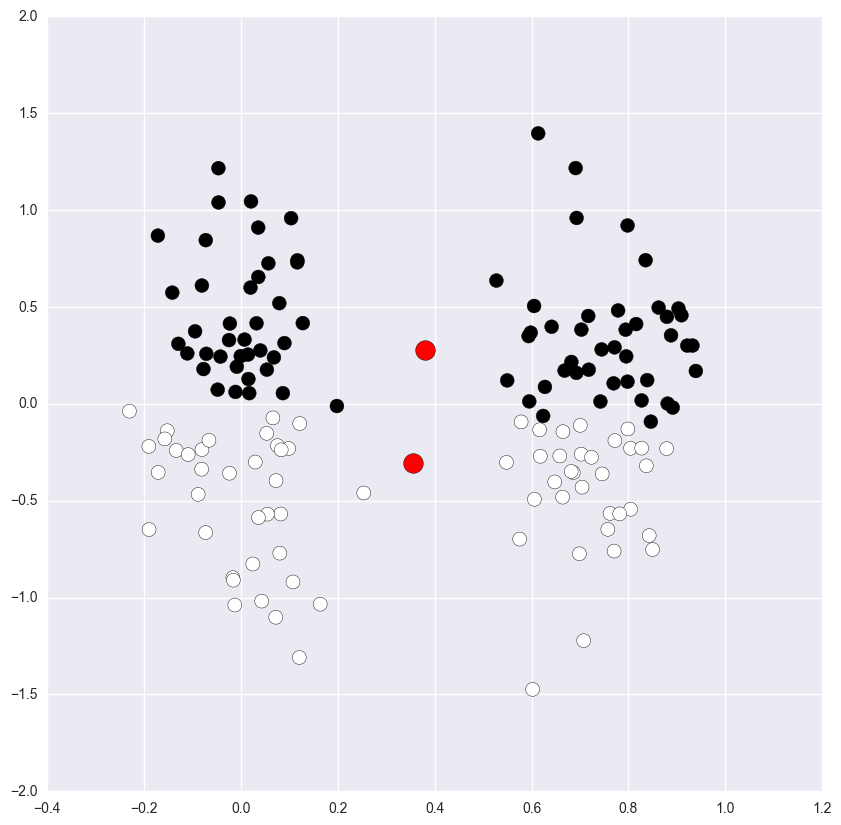

In [13]:
gmm = GMM(n_components=2, covariance_type='diag')
gmm.fit(data)

labels = gmm.predict(data)
print(adjusted_mutual_info_score(dlabels, labels))

plt.figure(figsize=(10,10))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=100)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], c='r', s=200)
plt.show()

If you play with the characteristics of the dataset, you will see that usually if data are separated enough or the variances are different enough, clusters that have similar number of examples are partitioned right most of the time.